# TMDB Movies Dataset: A case study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### About the dataset
> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?.

You can check the dataset from <a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata'>here</a>.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Questions we will try to answer:

* <a href= '#question1'>Does the movie rating (vote_average) affect the movie revenue?</a>
* <a href= '#question2'>What are the TOP 3 highest-rated genres? What are the TOP 3 lowest-rated ones?</a>
* <a href= '#question3'>Which year has the most number of produced movies?</a>

<a id='wrangling'></a>
## Data Wrangling

#### Create the dataframe

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### General Properties

#### Checking the first rows of the dataset

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Checking info and data types of each column in the dataframe

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Observations (Problems need to be fixed):
  * 'release_date' column has data type of string (object) instead of datetime. 
  * 'genres' column may be a seperate dataframe.
  * Fixing the missing values issues of the columns to be used in the analysis.

#### Fixing the 'release_date' column data type

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Creating a seperate dataframe for 'genres' column.

In [8]:
genres_df = df[['id', 'genres']]

In [9]:
genres_df.loc[:, 'genres'] = genres_df['genres'].apply(lambda x: x.split('|') if type(x) == str else x)

/home/thisisaemam/miniconda3/envs/ML/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
genres_df.head()

,id,genres
0,135397,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,"[Adventure, Science Fiction, Thriller]"
3,140607,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,"[Action, Crime, Thriller]"


In [11]:
genres_df = genres_df.explode('genres')

In [12]:
genres_df.head()

,id,genres
0,135397,Action
0,135397,Adventure
0,135397,Science Fiction
0,135397,Thriller
1,76341,Action


We can observe that each genre got its own row. But they are related with the 'id' column (for every movie) so we can get all of them easily using the movie id.

<a id='eda'></a>
## Exploratory Data Analysis

<a id= 'question1'></a>
### Does the movie rating (vote_average) affect the movie revenue?

We want to explore whether the movie rating ('vote_average' column) and the 'revenue' column have a correlation between them or not.

**So, we want to check that:** icreasing the vote_average -> increasing the revenue

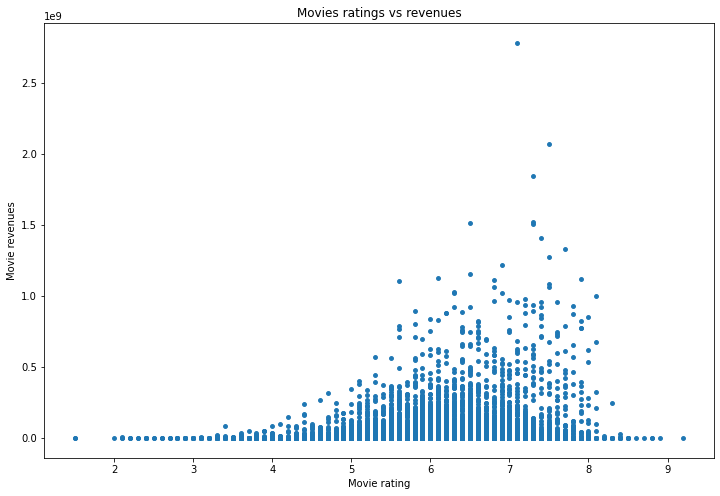

In [13]:
fig = plt.figure(figsize= (12, 8))
plt.scatter(df['vote_average'], df['revenue'], s= 15)
plt.title('Movies ratings vs revenues')
plt.xlabel('Movie rating')
plt.ylabel('Movie revenues')

plt.show()

#### Calculating the correlation numerically

In [14]:
print('Correlation: ', df['vote_average'].corr(df['revenue']))

Correlation:  0.17256374680270078


> From the plot and the correlation value, we can conclude that there is no explicit correlation between them.</br></br>**Conclusion**: getting a high rating doesn't guarantee getting high revenues.

<a id= 'question2'></a>
### What are the TOP 3 highest-rated genres? What are the TOP 3 lowest-rated ones?

#### Sorting the dataframe by the rating ('vote_average') column descendingly

We will **NOT** include movies that have low votes count (<500), as we can't depend on them much in our analysis.

In [15]:
# Sorting the dataframe in descending order
df_rated_desc = df.sort_values('vote_average', ascending= False)

# filter the sorted dataframe for votes count > 500, taking only the id, title, and rating columns only (we don't need the rest of the columns)
highest_100_rated = df_rated_desc[df_rated_desc['vote_count'] > 500][['id', 'original_title', 'vote_average']].iloc[:100, :]

In [16]:
highest_100_rated.head()

,id,original_title,vote_average
4178,278,The Shawshank Redemption,8.4
7269,238,The Godfather,8.3
650,244786,Whiplash,8.2
2875,155,The Dark Knight,8.1
4177,680,Pulp Fiction,8.1


In [17]:
genres_highest_100 = genres_df.merge(highest_100_rated, how= 'inner', on= 'id')

In [18]:
top_3_highest_genres = genres_highest_100['genres'].value_counts().to_frame().reset_index()

top_3_highest_genres.columns = ['genre', 'count']

In [19]:
top_3_highest_genres.head(3)

,genre,count
0,Drama,74
1,Thriller,25
2,Crime,22


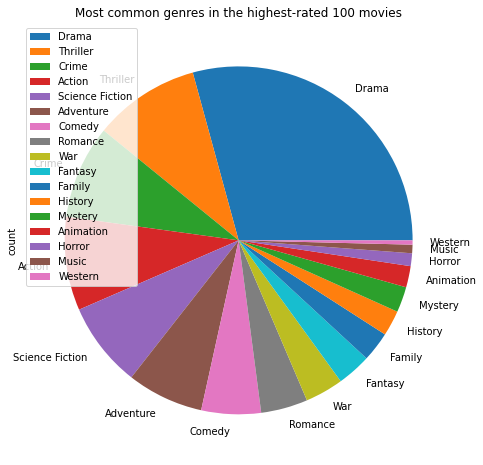

In [20]:
top_3_highest_genres.set_index('genre').plot.pie(y= 'count', figsize= (8, 8))
plt.title('Most common genres in the highest-rated 100 movies')

plt.show()

We can see that the highest rated genre of all time is "Drama" (by a huge margin), followed by "Thriller" and "Crime".

So the next time you consider producing a movie, make it more dramatic.

#### Sorting the dataframe by the rating ('vote_avergae') column ascendingly

In [21]:
# Sorting the dataframe in ascending order
df_rated_asc = df.sort_values('vote_average', ascending= True)

# filter the sorted dataframe for votes count > 500, taking only the id, title, and rating columns only (we don't need the rest of the columns)
lowest_100_rated = df_rated_asc[df_rated_asc['vote_count'] > 500][['id', 'original_title', 'vote_average']].iloc[:100, :]

In [22]:
lowest_100_rated.head()

,id,original_title,vote_average
102,241251,The Boy Next Door,3.9
61,166424,Fantastic Four,4.4
5535,87818,Movie 43,4.4
5236,415,Batman & Robin,4.4
5593,4258,Scary Movie 5,4.6


In [23]:
genres_lowest_100 = genres_df.merge(lowest_100_rated, how= 'inner', on= 'id')

In [24]:
top_3_lowest_genres = genres_lowest_100['genres'].value_counts().to_frame().reset_index()

top_3_lowest_genres.columns = ['genre', 'count']

In [25]:
top_3_lowest_genres.head(3)

,genre,count
0,Action,57
1,Adventure,41
2,Fantasy,36


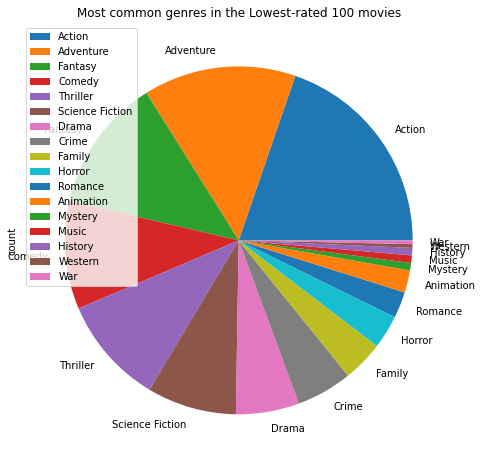

In [26]:
top_3_lowest_genres.set_index('genre').plot.pie(y= 'count', figsize= (8, 8))
plt.title('Most common genres in the Lowest-rated 100 movies')

plt.show()

We can observe that the lowest rated genres are: "Action", "Adventure", and "Fantasy" respectively.

<a id= 'question3'></a>
### Which year has the most number of produced movies?

#### Grouping movies by release year

In [27]:
grouped_by_year = df.groupby('release_year')

#### Which year has the highest number of produced movies?

In [28]:
movies_per_year = grouped_by_year.size().to_frame().reset_index()
movies_per_year.columns = ['release_year', 'count']
movies_per_year = movies_per_year.sort_values(by= 'count', ascending= False)

In [29]:
movies_per_year.head()

,release_year,count
54,2014,700
53,2013,659
55,2015,629
52,2012,588
51,2011,540


The year with the highest number of produced movies is 2014 (700 movies), followed by 2013 (659 movies) then 2015 (629 movies).

In [30]:
movies_per_year.tail()

,release_year,count
3,1963,34
2,1962,32
0,1960,32
1,1961,31
9,1969,31


I find this interesting, as by looking just to the head and tail of the sorted dataframe we can find an uprising trend of the number of the produced movies over the years.

Let's check it with a plot.

#### Plotting number of movies per year

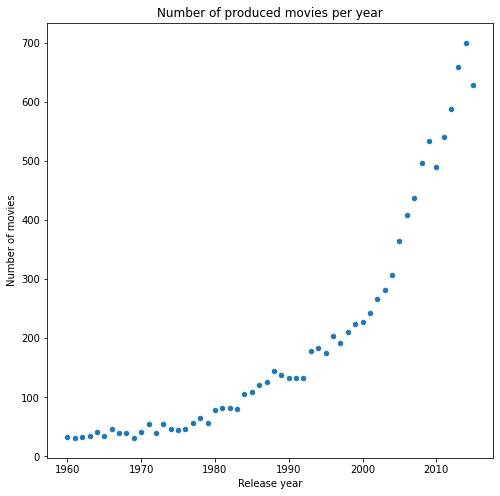

In [31]:
movies_per_year.plot(kind= 'scatter', x= 'release_year', y= 'count', figsize= (8, 8))
plt.title('Number of produced movies per year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

Interesting! As I thought, there is an uprising trend of the number of the produced movies over the years. It appears to be a kind of exponential trend? 

<a id='conclusions'></a>
## Conclusions

* For question 1, we can conclude that there are no guarantees that getting high rating will get the movie high revenue. People and critics may like some movies that are not best-sellers at the box office.

* For question 2, after exploring the genres of the highest-rated movies and lowest-rated ones then plotting them, we found out that 'Drama' genre gets the best ratings. While 'Action' and 'Fantasy' get the worst, and that shocking insight may need some more investigation to find out why they are not so likable between the critics and fans. 

* For question 3, we found out that there may be an uprising trend of the number of produced movies over the years and we confirmed it by plotting a scatter plot between the release year and the number of movies. This makes sense as the time goes on more technologies appear, so the movies production becomes easier day after day.

### Limitations:
* Dropping the rows with the missing values or filling them with a value (mean or median for example) may affect the analysis.
* 'Revenue' and 'Budget' columns may not be consistent as we are not sure that the values of all rows are with the same currency.
* As this is still a simple data analysis project, it lacks summary statistics of the dataset, which are helpful to get more insights about the data.